# Taller 4

In [37]:
import matplotlib as mp
from scipy.fftpack import fft

## Fast Fourier Transform: FFT, IFFT, FFTSHIFT, IFFTSHIFT

Para observar una aplicación sencilla de la transformada rápida de Fourier, se analiza la siguiente ecuación:

In [42]:
L=20 #definición de dominio computacional [-L/2,L/2]
n=128
x2=linspace(-L/2,L/2,n+1)
x=x2[0:n]

u=exp(-x*x)
ut=fft(u)
utshift=fftshift(ut)

plt.plot(x,u)

plt.show()
plt.plot(abs(ut))
plt.show()
plt.plot(abs(utshift))
plt.show()

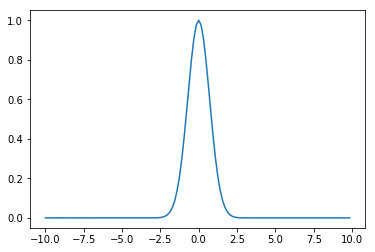

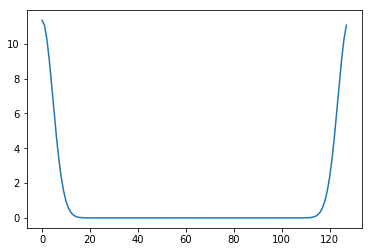

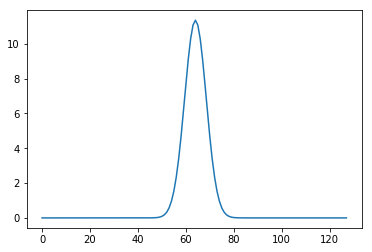

In [44]:
plt.plot(x,u)
plt.show()
plt.plot(abs(ut))
plt.show()
plt.plot(abs(utshift))
plt.show()